In [1]:
!pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/83/8d/f65f8138365462ace54458a9e164f4b28ce1141361970190eef36bdef986/transformers-4.32.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 890.3 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for huggingface-hub<1.0,>=0.15.1 from https://files.pythonhosted.org/packages/7f/c4/adcbe9a696c135578cabcbdd7331332daad4d49b7c43688bc2d36b3a47d2/huggingface_hub-0.16.4-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.16.4-py3-none-any.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.5 MB/s eta 0:00:0000:0100:01m
  Obtaining dependency information for safetensors>=0.3.1 from https://files.pythonhosted.org/packages/4c/49/d41e7f524bff04e51ebe560ecedb28127d8f4e424f9d250c106c3b7fb637/safetensors-0.3.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fsspec from https

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis") #使用情感分析
classifier(
    [
        "寶寶覺得苦，但寶寶不說",
        "我愛寶寶"
    ]
)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'NEGATIVE', 'score': 0.9581432938575745},
 {'label': 'POSITIVE', 'score': 0.6695571541786194}]

In [2]:
!pip install datasets

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/66/f8/38298237d18d4b6a8ee5dfe390e97bed5adb8e01ec6f9680c0ddf3066728/datasets-2.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for pyarrow>=8.0.0 from https://files.pythonhosted.org/packages/49/db/0a40d2a5b2382c77536479894ce2900e5f4c40251681a72d397ba6430f8d/pyarrow-13.0.0-cp39-cp39-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for dill<0.3.8,>=0.3.0 from https://files.pythonhosted.org/packages/f5/3a/74a29b11cf2cdfcd6ba89c0cecd70b37cd1ba7b77978ce611eb7a146a832/dill-0.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash from https://files.pythonhosted.org/packages/45/63/40da996350689cf29db7f8819aafa74c9d36feca4f0e4393d220c619a1dc/xxhash-3.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for multiprocess from https://files.pythonhosted.org/packages/c6/c9/820b5ab056f4ada76fbe05bd4

In [3]:
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("poem_sentiment")

In [4]:
print(ds_builder.info.description)
print(ds_builder.info.features)

Poem Sentiment is a sentiment dataset of poem verses from Project Gutenberg. This dataset can be used for tasks such as sentiment classification or style transfer for poems.

{'id': Value(dtype='int32', id=None), 'verse_text': Value(dtype='string', id=None), 'label': ClassLabel(names=['negative', 'positive', 'no_impact', 'mixed'], id=None)}


In [5]:
from datasets import load_dataset
sentiment = load_dataset("poem_sentiment")

Generating train split:   0%|          | 0/892 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/105 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/104 [00:00<?, ? examples/s]

In [6]:
sentiment

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [7]:
train_ds = sentiment["train"]
valid_ds = sentiment["validation"]
test_ds = sentiment["test"]

In [8]:
dataset_train = load_dataset("rotten_tomatoes", split="train")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [9]:
import pandas as pd
sentiment.set_format(type="pandas")
df = sentiment["train"][:]
df.head(10)

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
5,5,the red sword sealed their vows!,3
6,6,and very venus of a pipe.,2
7,7,"who the man, who, called a brother.",2
8,8,"and so on. then a worthless gaud or two,",0
9,9,to hide the orb of truth--and every throne,2


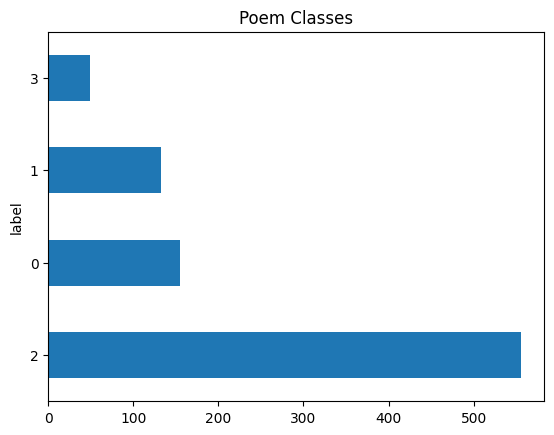

In [11]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot.barh()
plt.title("Poem Classes")
plt.show()

In [12]:
sentiment_train = sentiment["train"].shuffle(seed=5566).select(range(100))

In [13]:
sentiment_filtered = sentiment.filter(lambda x: len(x["verse_text"]) > 30)
sentiment_filtered

Filter:   0%|          | 0/892 [00:00<?, ? examples/s]

Filter:   0%|          | 0/105 [00:00<?, ? examples/s]

Filter:   0%|          | 0/104 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 678
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 84
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 73
    })
})

In [14]:
new_dataset = sentiment.map(
    lambda x: {"verse_text": [ len(o) for o in x["verse_text"] ] }, batched=True
)
new_dataset['test'][:3]

Map:   0%|          | 0/892 [00:00<?, ? examples/s]

Map:   0%|          | 0/105 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

,verse_text
0,29
1,69
2,44


In [16]:
!pip install zstandard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.3 MB/s eta 0:00:0000:0100:01


In [17]:
from datasets import load_dataset
url = "https://mystic.the-eye.eu/public/AI/pile_preliminary_components/NIH_ExPORTER_awarded_grant_text.jsonl.zst"
nih_dataset = load_dataset("csv", data_files=url, split= "train")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetGenerationError: An error occurred while generating the dataset